In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### Numerical Datam

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [3]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100


Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [7]:
X_train


,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


### In below step we will fill the missing values in the age_imputed column from the age column column randomly before equal to it foun out all the nan value and the after equal to it exactily sample out the requred values i.e 148 randomly

In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([18.  , 42.  , 13.  , 41.  , 28.  , 14.  , 52.  ,  2.  , 40.  ,
       54.  , 47.  , 18.  , 50.  , 50.  , 30.  , 22.  , 24.  , 24.  ,
       49.  ,  0.67, 24.  , 26.  ,  9.  , 18.  , 16.  ,  9.  , 24.  ,
       27.  , 24.  ,  4.  , 42.  , 22.  , 52.  , 23.  , 33.  , 41.  ,
       50.  , 30.  , 51.  , 45.  , 24.  , 25.  , 28.  , 34.  , 21.  ,
       47.  , 22.  , 26.  , 50.  , 25.  , 47.  ,  7.  , 37.  , 35.  ,
       44.  , 15.  , 61.  , 31.  , 47.  , 31.  , 25.  , 17.  ,  2.  ,
       25.  , 29.  , 20.  , 65.  , 65.  , 36.5 , 24.  , 25.  , 23.  ,
       21.  ,  5.  , 66.  , 30.  , 40.  , 27.  , 17.  , 38.  , 22.  ,
       24.  , 60.  , 36.  , 51.  , 16.  , 61.  , 38.  , 24.  , 24.  ,
       30.  , 25.  , 39.  , 23.  , 28.  , 11.  , 21.  , 29.  , 35.  ,
       37.  , 28.  , 24.  , 45.  ,  1.  , 29.  , 40.  , 18.  , 28.  ,
       32.  , 34.  , 22.  , 54.  , 26.  ,  1.  , 16.  , 33.  , 20.  ,
       28.  , 48.  , 16.  , 23.  , 33.  , 19.  , 18.  , 60.  , 32.  ,
       39.  , 33.  ,

In [13]:
X_train['Age'].isnull().sum()


148

In [15]:
X_train # now we can see theree are no missing values in age_imputed column


,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,60.0
493,71.0,49.5042,71.0
527,NaN,221.7792,36.0


C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


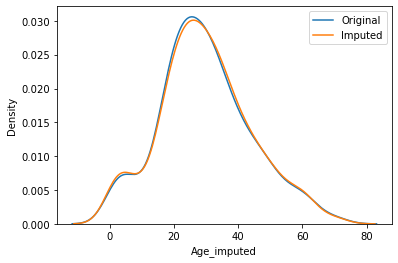

In [16]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.76345945653352


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.942703
Age,71.512440,204.349513,204.349513
Age_imputed,60.942703,204.349513,206.763459


<AxesSubplot:>

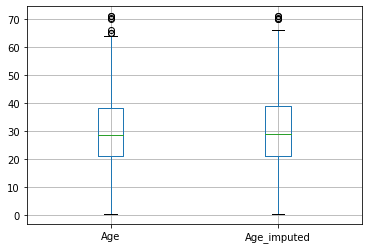

In [20]:
X_train[['Age', 'Age_imputed']].boxplot()
# used to find out outliers and we can see there no impact on the outliers thuus there are same amount of outlieres

In [24]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
# this above code is used for production as if user enter the same input thus the
#sample should not be change as it will give the different result for the smae input
#Don't run this code as it is gnereating error

### For Catogorical Data 

In [26]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [27]:
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [29]:
X = data
y = data['SalePrice']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [31]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [32]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
277,NaN,TA,141000,TA,NaN
1136,NaN,TA,119000,TA,NaN
1030,NaN,NaN,160000,NaN,NaN
468,Gd,TA,250000,TA,Gd
1009,NaN,NaN,102000,NaN,NaN


In [33]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\soham\AppData\Local\Temp\ipykernel_15304\613679808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\soham\AppData\Local\Temp\ipykernel_15304\613679808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\soham\AppData\Local\Temp\ipykernel_15304\613679808.py:4: SettingWithCopyWarning: 
A va

In [34]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [36]:
temp # as we can ther is no much difference in the values thus we can use this techniq


,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [37]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.544332
Fa,0.040917,0.051627
Po,0.027823,0.038159
Ex,0.024550,0.030303


C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

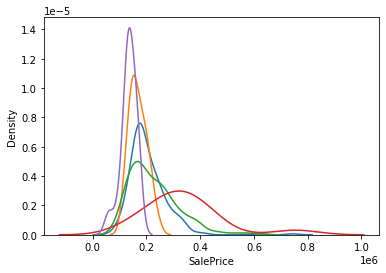

In [38]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\soham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

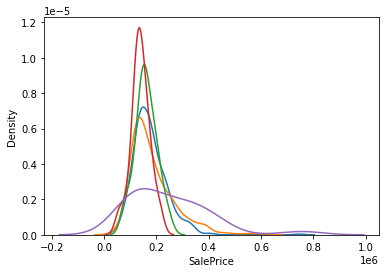

In [39]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()